**2020.04.08 수정사항입니다.**

구글 코랩이 2020년 2월 유료화 정책을 시작(https://colab.research.google.com/signup)하면서 무료 버전에 고용량 RAM 모드를 지원하지 않게 되었습니다. 1쇄의 예제 8.16은 고용량 RAM 모드의 지원을 상정하고 작성되었기 때문에 이 서비스를 사용하실 수 없는 분들은 학습이 어려우실 수 있습니다.

때문에 예제 8.16을 수정한 버전을 코랩에 올려놓습니다. 이 부분은 램의 용량에 따라 학습이 가능할 수도 있기 때문에 코랩 유료 버전이나 GPU 용량이 충분하신 분들은 원래 Chapter 8의 예제 파일(https://drive.google.com/open?id=1mj7xE2W5BSMRqbdhdAYHFX-6qgqIQbxV)을 사용하시면 됩니다. 

변경된 부분은 크게 2개입니다. 
1. 텐서플로의 버전을 2.1.0으로 다시 설치한 후 진행하는 코드를 첫 부분에 추가했습니다. 
(기존 코드를 최대한 살리기 위해 ImageDataGenerator를 사용해서 직접 학습을 시키려고 했습니다만 현재(2020.04.08) 텐서플로 2.2.0-rc2 버전에서는 ImageDataGenerator를 사용해서 model.fit()이나 model.fit_generator()를 학습시키려 할 경우 1 epoch 진행 후 무한루프에 걸리는 문제가 있기 때문에 텐서플로를 2.1.0으로 다시 설치했습니다.)
2. 예제 8.16을 예제 8.24, 예제 8.25의 내용을 이용하여 수정했고 예제 8.19의 학습 코드도 일부 수정했습니다. 수정된 부분은 최대한 자세하게 주석을 달았습니다. 독자분들께 불편을 드려 죄송합니다.


<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

In [1]:
# 텐서플로 2 버전 선택
# try:
#     # %tensorflow_version only exists in Colab.
#     %tensorflow_version 2.x
# except Exception:
#     pass

# 텐서플로 2.1.0 버전 설치
!pip install tensorflow==2.1.0
import tensorflow as tf
import numpy as np

     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 3.9MB 52.7MB/s 
     |████████████████████████████████| 450kB 71.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=4b5732cae66f9b6f6ff671365ed9b4a7359989feeb924d0df70afd6e740fcf86
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

#8.1 텐서플로 허브(Tensorflow Hub)

In [2]:
# 8.1 텐서플로 허브에서 사전 훈련된 MobileNet 모델 불러오기
import tensorflow_hub as hub

mobile_net_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
model = tf.keras.Sequential([
    hub.KerasLayer(handle=mobile_net_url, input_shape=(224, 224, 3), trainable=False)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


14540800/14536120 [==============================] - 2s 0us/step


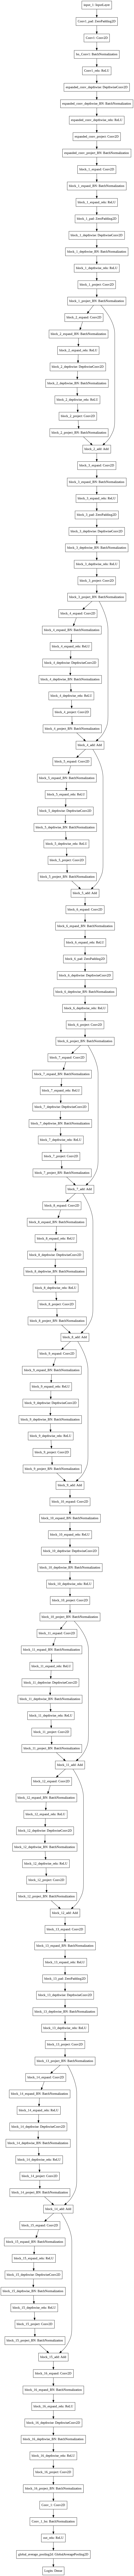

In [3]:
# 그림 8.2 좌측 전체 네트워크 구조 출력 코드
from tensorflow.keras.applications import MobileNetV2

mobilev2 = MobileNetV2()
tf.keras.utils.plot_model(mobilev2)

In [4]:
# 8.2 ImageNetV2-TopImages 불러오기
import os
import pathlib
content_data_url = '/content/sample_data'
data_root_orig = tf.keras.utils.get_file('imagenetV2', 'https://s3-us-west-2.amazonaws.com/imagenetv2public/imagenetv2-topimages.tar.gz', cache_dir=content_data_url, extract=True)
data_root = pathlib.Path(content_data_url + '/datasets/imagenetv2-top-images-format-val')
print(data_root)

1234968576/1234964480 [==============================] - 61s 0us/step
/content/sample_data/datasets/imagenetv2-top-images-format-val


In [6]:
# 8.3 디렉토리 출력
for idx, item in enumerate(data_root.iterdir()):
    print(item)
    if idx == 9:
        break

/content/sample_data/datasets/imagenetv2-top-images-format-val/55
/content/sample_data/datasets/imagenetv2-top-images-format-val/107
/content/sample_data/datasets/imagenetv2-top-images-format-val/881
/content/sample_data/datasets/imagenetv2-top-images-format-val/701
/content/sample_data/datasets/imagenetv2-top-images-format-val/191
/content/sample_data/datasets/imagenetv2-top-images-format-val/257
/content/sample_data/datasets/imagenetv2-top-images-format-val/705
/content/sample_data/datasets/imagenetv2-top-images-format-val/868
/content/sample_data/datasets/imagenetv2-top-images-format-val/93
/content/sample_data/datasets/imagenetv2-top-images-format-val/233


In [ ]:
# 8.4 ImageNet 라벨 텍스트 불러오기
label_file = tf.keras.utils.get_file('label', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
label_text = None
with open(label_file, 'r') as f:
    label_text = f.read().split('\n')[:-1]
print(len(label_text))
print(label_text[:10])
print(label_text[-10:])

16384/10484 [==============================================] - 0s 0us/step
1001
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen']
['buckeye', 'coral fungus', 'agaric', 'gyromitra', 'stinkhorn', 'earthstar', 'hen-of-the-woods', 'bolete', 'ear', 'toilet tissue']


image_count: 10000


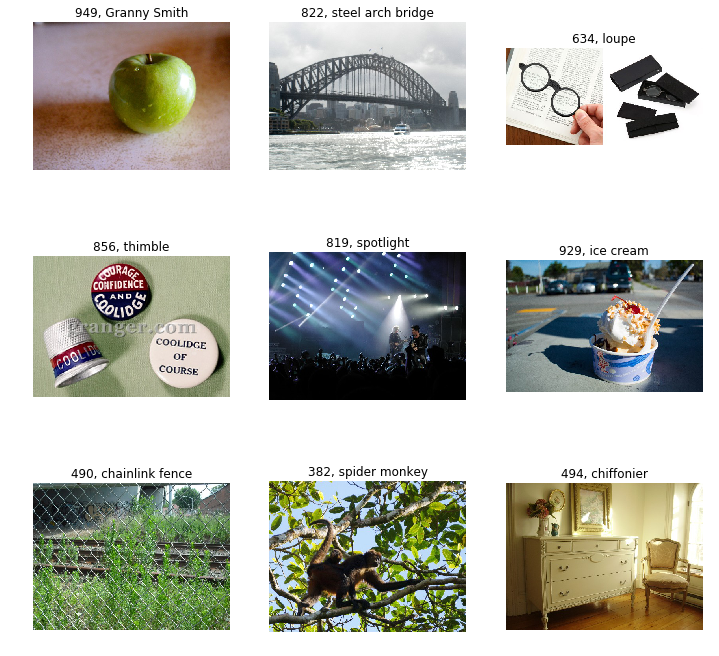

In [ ]:
# 8.5 이미지 확인
import PIL.Image as Image
import matplotlib.pyplot as plt
import random

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
# 이미지를 랜덤하게 섞습니다.
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print('image_count:', image_count)

plt.figure(figsize=(12,12))
for c in range(9):
    image_path = random.choice(all_image_paths)
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread(image_path))
    idx = int(image_path.split('/')[-2]) + 1
    plt.title(str(idx) + ', ' + label_text[idx])
    plt.axis('off')
plt.show()

In [ ]:
# 8.6 MobileNet의 분류 성능 확인
import cv2

top_1 = 0
top_5 = 0
for image_path in all_image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    top_5_predict = model.predict(img)[0].argsort()[::-1][:5]
    idx = int(image_path.split('/')[-2])+1
    if idx in top_5_predict:
        top_5 += 1
        if top_5_predict[0] == idx:
            top_1 += 1

print('Top-5 correctness:', top_5 / len(all_image_paths) * 100, '%')
print('Top-1 correctness:', top_1 / len(all_image_paths) * 100, '%')

Top-5 correctness: 83.84 %
Top-1 correctness: 59.45 %


In [ ]:
# numpy.argsort() 설명 코드
a = np.array([99,32,5,64])
arg = np.argsort(a)
print(arg)
print(np.sort(a))
print(a[arg])

[2 1 3 0]
[ 5 32 64 99]
[ 5 32 64 99]


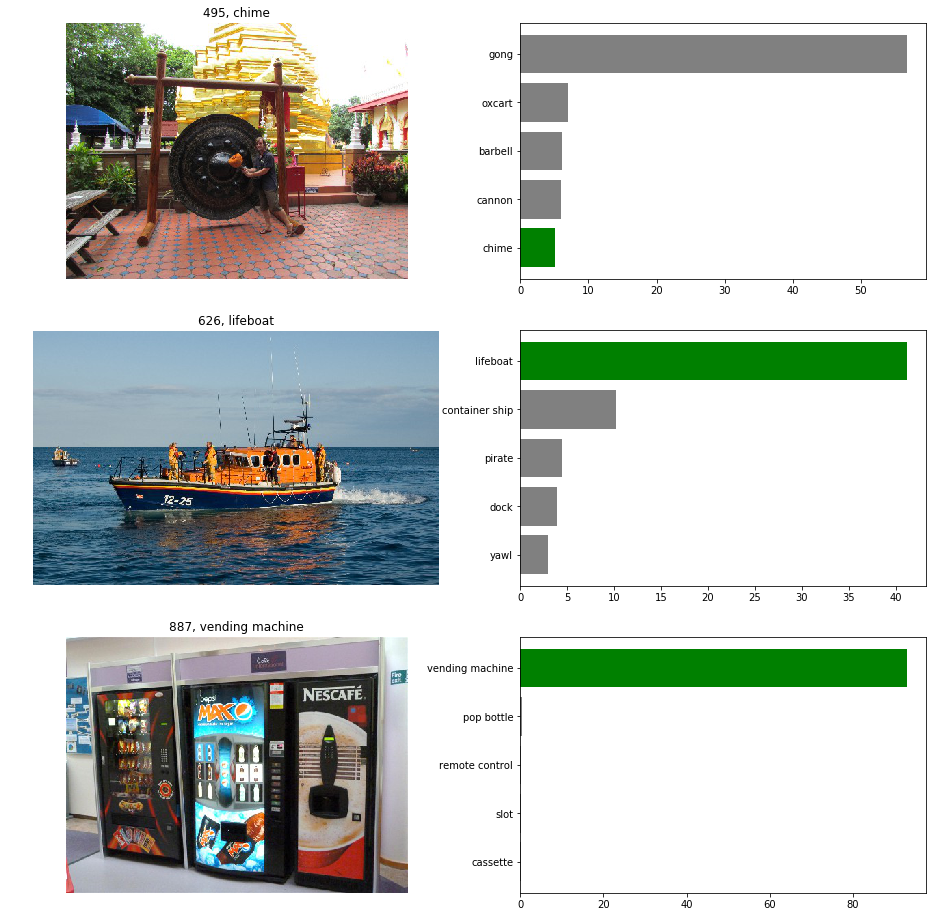

In [ ]:
# 8.7 MobileNet의 분류 라벨 확인
plt.figure(figsize=(16,16))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
  
for c in range(3):
    image_path = random.choice(all_image_paths)
    
    # 이미지 표시
    plt.subplot(3,2,c*2+1)
    plt.imshow(plt.imread(image_path))
    idx = int(image_path.split('/')[-2]) + 1
    plt.title(str(idx) + ', ' + label_text[idx])
    plt.axis('off')
    
    # 예측값 표시
    plt.subplot(3,2,c*2+2)
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    # MobileNet을 이용한 예측
    logits = model.predict(img)[0]
    prediction = softmax(logits)
    
    # 가장 높은 확률의 예측값 5개를 뽑음
    top_5_predict = prediction.argsort()[::-1][:5]
    labels = [label_text[index] for index in top_5_predict]
    color = ['gray'] * 5
    if idx in top_5_predict:
        color[top_5_predict.tolist().index(idx)] = 'green'
    color = color[::-1]
    plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
    plt.yticks(range(5), labels[::-1])    

#8.2 Transfer Learning

## 8.2.1 모델의 일부를 재학습시키기

In [ ]:
# kaggle API를 설치합니다.
!pip install kaggle

In [ ]:
# 8.8 Stanford Dog Dataset을 Kaggle에서 불러오기

# 2020.02.01 현재 kaggle의 Stanford Dog Dataset 파일 구조가 변경되었습니다. 
# kaggle API를 사용하는 대신에 아래 링크에서 파일을 직접 받아오도록 수정되었습니다.
tf.keras.utils.get_file('/content/labels.csv', 'http://bit.ly/2GDxsYS')
tf.keras.utils.get_file('/content/sample_submission.csv', 'http://bit.ly/2GGnMNd')
tf.keras.utils.get_file('/content/train.zip', 'http://bit.ly/31nIyel')
tf.keras.utils.get_file('/content/test.zip', 'http://bit.ly/2GHEsnO')

import os
os.environ['KAGGLE_USERNAME'] = 'user_id' # 독자의 캐글 ID
os.environ['KAGGLE_KEY'] = 'user_api_token' # 독자의 캐글 API Token
# !kaggle competitions download -c dog-breed-identification

362848256/362841195 [==============================] - 31s 0us/step


In [ ]:
# 8.9 파일의 압축 풀기
!unzip train.zip
# !unzip labels.csv.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/841463629c4833816e216cbb041c2778.jpg  
  inflating: train/8429dcca4ae91c4e0

In [ ]:
# 8.10 labels.csv 파일 내용 확인
import pandas as pd
label_text = pd.read_csv('labels.csv')
print(label_text.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
# 8.11 labels.csv 정보 확인
label_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [ ]:
# 8.12 견종 수 확인
label_text['breed'].nunique()

120

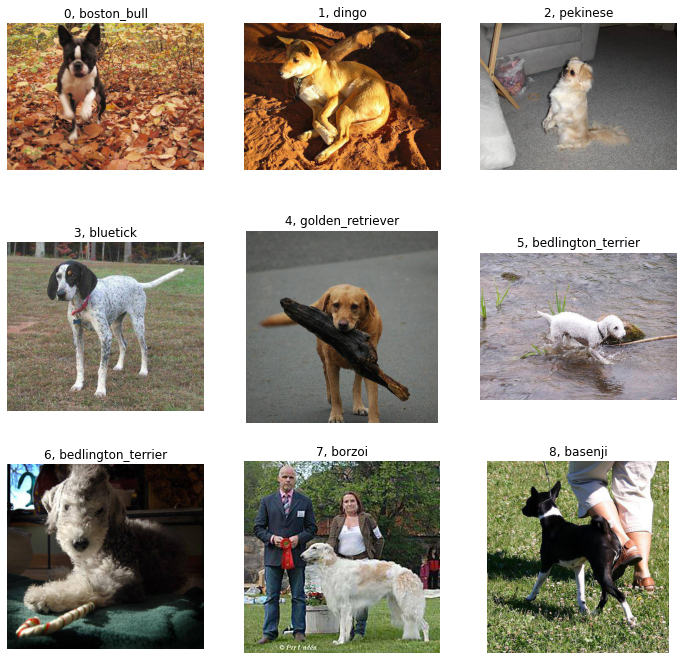

In [ ]:
# 8.13 이미지 확인
import PIL.Image as Image
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for c in range(9):
    image_id = label_text.loc[c, 'id']
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread('/content/train/' + image_id + '.jpg'))
    plt.title(str(c) + ', ' + label_text.loc[c, 'breed'])
    plt.axis('off')
plt.show()

In [ ]:
# 8.14 tf.keras에서 MobileNet V2 불러오기
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

14540800/14536120 [==============================] - 1s 0us/step


In [ ]:
# 8.15 MobileNet V2의 가중치 초기화
for layer in mobilev2.layers[:-1]:
    layer.trainable = True
    
for layer in mobilev2.layers[:-1]: 
    if 'kernel' in layer.__dict__:
        kernel_shape = np.array(layer.get_weights()).shape
        # weight를 평균이 0, 표준편차가 1인 random 변수로 초기화
        layer.set_weights(tf.random.normal(kernel_shape, 0, 1))        

In [ ]:
# # 8.16 train 데이터를 메모리에 로드
# import cv2

# train_X = []
# for i in range(len(label_text)):
#     img = cv2.imread('/content/train/' + label_text['id'][i] + '.jpg')
#     img = cv2.resize(img, dsize=(224, 224))
#     img = img / 255.0
#     train_X.append(img)
# train_X = np.array(train_X)
# print(train_X.shape)
# print(train_X.size * train_X.itemsize, ' bytes')

# 2020.04.08 수정된 부분입니다.
# 예제 8.16은 고용량 RAM 모드를 지원하지 않는 무료 버전의 경우 OOM(Out Of Memory) 문제를 일으키기 때문에 주석처리합니다.
# 대신에 예제 8.24와 8.25를 이용해서 ImageDataGenerator로 학습을 시킵니다.

# 8.24 ImageDataGenerator가 처리할 수 있는 하위 디렉토리 구조로 데이터 복사
import os
import shutil

os.mkdir('/content/train_sub')

for i in range(len(label_text)):
    if os.path.exists('/content/train_sub/' + label_text.loc[i]['breed']) == False:
        os.mkdir('/content/train_sub/' + label_text.loc[i]['breed'])
    shutil.copy('/content/train/' + label_text.loc[i]['id'] + '.jpg', '/content/train_sub/' + label_text.loc[i]['breed'])

# 8.25 ImageDataGenerator를 이용한 train/validation 데이터 분리, Image Augmentation
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import preprocess_input

image_size = 224 # 이미지 사이즈가 299에서 224로 바뀌었습니다.
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255., horizontal_flip=True, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, validation_split=0.25)
valid_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25)

train_generator = train_datagen.flow_from_directory(directory="/content/train_sub/", subset="training", batch_size=batch_size, seed=42, shuffle=True, class_mode="categorical", target_size=(image_size, image_size))
valid_generator = valid_datagen.flow_from_directory(directory="/content/train_sub/", subset="validation", batch_size=1, seed=42, shuffle=True, class_mode="categorical", target_size=(image_size, image_size))

Using TensorFlow backend.


Found 7718 images belonging to 120 classes.
Found 2504 images belonging to 120 classes.


In [ ]:
# 8.17 train 라벨 데이터를 메모리에 로드
unique_Y = label_text['breed'].unique().tolist()
train_Y = [unique_Y.index(breed) for breed in label_text['breed']]
train_Y = np.array(train_Y)

print(train_Y[:10])
print(train_Y[-10:])

[0 1 2 3 4 5 5 6 7 8]
[34 87 91 63 48  6 93 63 77 92]


In [ ]:
# 8.18 Dogs Dataset 학습을 위한 모델 정의
x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

# model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # 라벨이 원-핫 인코딩을 사용하기 때문에 sparse가 아닌 categorical_crossentropy를 사용합니다.
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [ ]:
# 8.19 랜덤한 가중치를 가진 상태에서의 학습
# history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25, batch_size=32)
steps_per_epoch = int(7718/32) # generator를 사용하기 때문에 1epoch 당 학습할 step수를 정합니다. batch_size인 32로 train_data의 크기를 나눠주면 됩니다.
history = model.fit_generator(train_generator, validation_data=valid_generator, epochs=10, steps_per_epoch=steps_per_epoch) # model.fit_generator()를 사용합니다.

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 241 steps, validate for 2504 steps
Epoch 1/10
241/241 [==============================] - 133s 552ms/step - loss: 4.9144 - accuracy: 0.0094 - val_loss: 8.1092 - val_accuracy: 0.0080
Epoch 2/10
241/241 [==============================] - 124s 514ms/step - loss: 4.8828 - accuracy: 0.0088 - val_loss: 8.4867 - val_accuracy: 0.0104
Epoch 3/10
241/241 [==============================] - 123s 510ms/step - loss: 4.8697 - accuracy: 0.0107 - val_loss: 7.7709 - val_accuracy: 0.0108
Epoch 4/10
241/241 [==============================] - 123s 511ms/step - loss: 4.8571 - accuracy: 0.0100 - val_loss: 8.6571 - val_accuracy: 0.0068
Epoch 5/10
241/241 [==============================] - 122s 507ms/step - loss: 4.8416 - accuracy: 0.0130 - val_loss: 7.6221 - val_accuracy: 0.0072
Epoch 6/10
241/241 [==============================] - 122s 504ms/step - loss: 4.8356 - accuracy: 0.

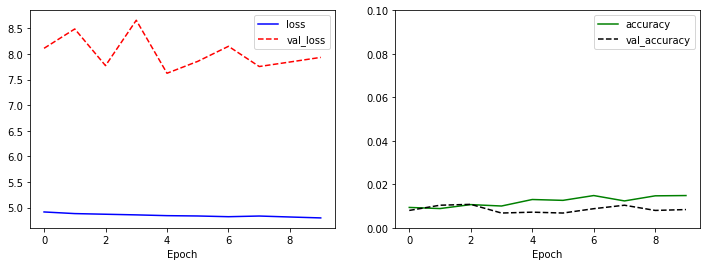

In [ ]:
# 8.20 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 0.1)
plt.legend()

plt.show()

In [ ]:
# 8.21 Dogs Dataset 학습을 위한 Transfer Learning 모델 정의
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

# 뒤에서 20개까지의 레이어는 훈련 가능, 나머지는 가중치 고정
for layer in model.layers[:-20]:
    layer.trainable = False
for layer in model.layers[-20:]:
    layer.trainable = True

# model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # 라벨이 원-핫 인코딩을 사용하기 때문에 sparse가 아닌 categorical_crossentropy를 사용합니다.
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 241 steps, validate for 2504 steps
Epoch 1/10
241/241 [==============================] - 122s 506ms/step - loss: 3.2360 - accuracy: 0.3076 - val_loss: 1.7004 - val_accuracy: 0.5280
Epoch 2/10
241/241 [==============================] - 116s 480ms/step - loss: 1.6002 - accuracy: 0.6094 - val_loss: 1.4025 - val_accuracy: 0.5935
Epoch 3/10
241/241 [==============================] - 115s 478ms/step - loss: 1.2159 - accuracy: 0.6896 - val_loss: 1.2756 - val_accuracy: 0.6234
Epoch 4/10
241/241 [==============================] - 117s 486ms/step - loss: 1.0129 - accuracy: 0.7282 - val_loss: 1.2481 - val_accuracy: 0.6282
Epoch 5/10
241/241 [==============================] - 117s 487ms/step - loss: 0.8864 - accuracy: 0.7632 - val_loss: 1.2081 - val_accuracy: 0.6470
Epoch 6/10
241/241 [==============================] - 117s 485ms/step - loss: 0.7905 - accuracy: 0.

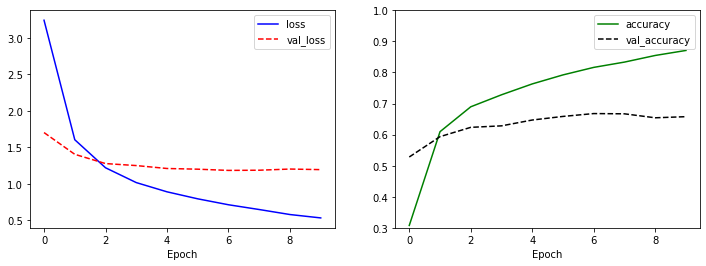

In [ ]:
# 8.22 모델 학습 및 결과 확인
# history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25, batch_size=32)
steps_per_epoch = int(7718/32) # generator를 사용하기 때문에 1epoch 당 학습할 step수를 정합니다. batch_size인 32로 train_data의 크기를 나눠주면 됩니다.
history = model.fit_generator(train_generator, validation_data=valid_generator, epochs=10, steps_per_epoch=steps_per_epoch) # model.fit_generator()를 사용합니다.

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.3, 1)
plt.legend()

plt.show()

## 8.2.2 특징 추출기

In [ ]:
# 8.23 텐서플로우 허브에서 사전 훈련된 Inception V3의 특징 추출기 불러오기
import tensorflow_hub as hub

inception_url = 'https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4'
feature_model = tf.keras.Sequential([
    hub.KerasLayer(inception_url, output_shape=(2048,), trainable=False)
])
feature_model.build([None, 299, 299, 3])
feature_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  21802784  
Total params: 21,802,784
Trainable params: 0
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# 8.24 ImageDataGenerator가 처리할 수 있는 하위 디렉토리 구조로 데이터 복사
import os
import shutil

os.mkdir('/content/train_sub')

for i in range(len(label_text)):
    if os.path.exists('/content/train_sub/' + label_text.loc[i]['breed']) == False:
        os.mkdir('/content/train_sub/' + label_text.loc[i]['breed'])
    shutil.copy('/content/train/' + label_text.loc[i]['id'] + '.jpg', '/content/train_sub/' + label_text.loc[i]['breed'])

In [ ]:
# 8.25 ImageDataGenerator를 이용한 train/validation 데이터 분리, Image Augmentation
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import preprocess_input

image_size = 299
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255., horizontal_flip=True, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, validation_split=0.25)
valid_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.25)

train_generator = train_datagen.flow_from_directory(directory="/content/train_sub/", subset="training", batch_size=batch_size, seed=42, shuffle=True, class_mode="categorical", target_size=(image_size, image_size))
valid_generator = valid_datagen.flow_from_directory(directory="/content/train_sub/", subset="validation", batch_size=1, seed=42, shuffle=True, class_mode="categorical", target_size=(image_size, image_size))

Using TensorFlow backend.


Found 7718 images belonging to 120 classes.
Found 2504 images belonging to 120 classes.


In [ ]:
# 8.26 train 데이터를 특징 벡터로 변환
batch_step = (7718 * 3) // batch_size
train_features = []
train_Y = []
for idx in range(batch_step):
    if idx % 100 == 0:
        print(idx)
    x, y = train_generator.next()
    train_Y.extend(y)
    
    feature = feature_model.predict(x)
    train_features.extend(feature)

train_features = np.array(train_features)
train_Y = np.array(train_Y)
print(train_features.shape)
print(train_Y.shape)

0
100
200
300
400
500
600
700
(23084, 2048)
(23084, 120)


In [ ]:
# 8.27 validation 데이터를 특징 벡터로 변환
valid_features = []
valid_Y = []

for idx in range(valid_generator.n):
    if idx % 100 == 0:
        print(idx)
    x, y = valid_generator.next()
    valid_Y.extend(y)
    
    feature = feature_model.predict(x)
    valid_features.extend(feature)

valid_features = np.array(valid_features)
valid_Y = np.array(valid_Y)
print(valid_features.shape)
print(valid_Y.shape)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
(2504, 2048)
(2504, 120)


In [ ]:
# 8.28 분류를 위한 작은 Sequential 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(2048,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(120, activation='softmax')
])

model.compile(tf.optimizers.RMSprop(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               30840     
Total params: 555,384
Trainable params: 555,384
Non-trainable params: 0
_________________________________________________________________


Train on 23084 samples, validate on 2504 samples
Epoch 1/10
23084/23084 [==============================] - 3s 115us/sample - loss: 2.8390 - accuracy: 0.4471 - val_loss: 0.9109 - val_accuracy: 0.8670
Epoch 2/10
23084/23084 [==============================] - 2s 95us/sample - loss: 0.9286 - accuracy: 0.7840 - val_loss: 0.4160 - val_accuracy: 0.8938
Epoch 3/10
23084/23084 [==============================] - 2s 96us/sample - loss: 0.6177 - accuracy: 0.8291 - val_loss: 0.3466 - val_accuracy: 0.8986
Epoch 4/10
23084/23084 [==============================] - 2s 92us/sample - loss: 0.5081 - accuracy: 0.8519 - val_loss: 0.3233 - val_accuracy: 0.8950
Epoch 5/10
23084/23084 [==============================] - 2s 93us/sample - loss: 0.4465 - accuracy: 0.8628 - val_loss: 0.3129 - val_accuracy: 0.8994
Epoch 6/10
23084/23084 [==============================] - 2s 96us/sample - loss: 0.4033 - accuracy: 0.8759 - val_loss: 0.3030 - val_accuracy: 0.9018
Epoch 7/10
23084/23084 [==============================] 

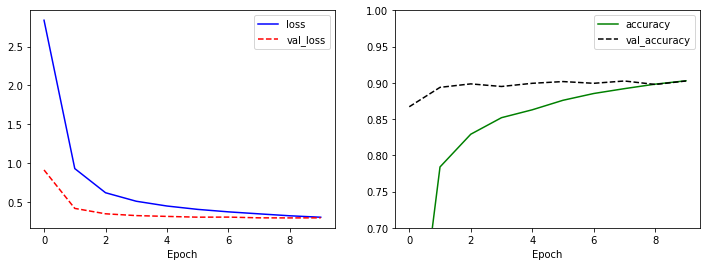

In [ ]:
# 8.29 분류를 위한 작은 Sequential 모델 학습
history = model.fit(train_features, train_Y, validation_data=(valid_features, valid_Y), epochs=10, batch_size=32)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.8, 1)
plt.legend()

plt.show()

In [ ]:
# 8.30 라벨 텍스트를 알파벳 순으로 정렬
unique_sorted_Y = sorted(unique_Y)
print(unique_sorted_Y)

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


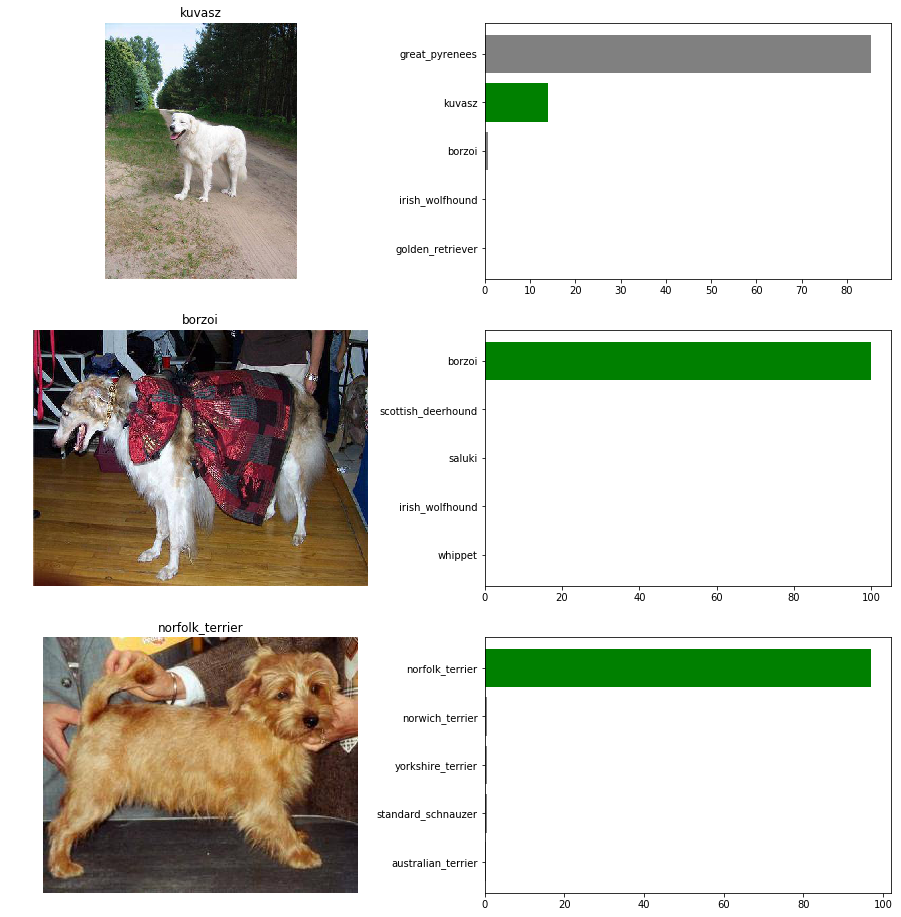

In [ ]:
# 8.31 Inception V3 특징 추출기-Sequential 모델의 분류 라벨 확인
import random
plt.figure(figsize=(16,16))
  
for c in range(3):
    image_path = random.choice(valid_generator.filepaths)
    
    # 이미지 표시
    plt.subplot(3,2,c*2+1)
    plt.imshow(plt.imread(image_path))
    real_y = image_path.split('/')[3]
    plt.title(real_y)
    plt.axis('off')
    idx = unique_sorted_Y.index(real_y)
    
    # 예측값 표시
    plt.subplot(3,2,c*2+2)
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(299, 299))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Inception V3를 이용한 특징 벡터 추출
    feature_vector = feature_model.predict(img)
    
    # Sequential 모델을 이용한 예측
    prediction = model.predict(feature_vector)[0]
    
    # 가장 높은 확률의 예측값 5개를 뽑음
    top_5_predict = prediction.argsort()[::-1][:5]
    labels = [unique_sorted_Y[index] for index in top_5_predict]
    color = ['gray'] * 5
    if idx in top_5_predict:
        color[top_5_predict.tolist().index(idx)] = 'green'
    color = color[::-1]
    plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
    plt.yticks(range(5), labels[::-1])

In [ ]:
# 8.32 test 데이터의 압축 풀기
!unzip test.zip
!unzip sample_submission.csv.zip

Archive:  test.zip
   creating: test/
  inflating: test/000621fb3cbb32d8935728e48679680e.jpg  
  inflating: test/00102ee9d8eb90812350685311fe5890.jpg  
  inflating: test/0012a730dfa437f5f3613fb75efcd4ce.jpg  
  inflating: test/001510bc8570bbeee98c8d80c8a95ec1.jpg  
  inflating: test/001a5f3114548acdefa3d4da05474c2e.jpg  
  inflating: test/00225dcd3e4d2410dd53239f95c0352f.jpg  
  inflating: test/002c2a3117c2193b4d26400ce431eebd.jpg  
  inflating: test/002c58d413a521ae8d1a5daeb35fc803.jpg  
  inflating: test/002f80396f1e3db687c5932d7978b196.jpg  
  inflating: test/0036c6bcec6031be9e62a257b1c3c442.jpg  
  inflating: test/0041940322116ae58c38130f5a6f71f9.jpg  
  inflating: test/0042d6bf3e5f3700865886db32689436.jpg  
  inflating: test/004476c96f575879af4af471af65cae8.jpg  
  inflating: test/00485d47de966a9437ad3b33ac193b6f.jpg  
  inflating: test/00496f65de6cc319145ce97bd6e90360.jpg  
  inflating: test/004bf14426d1a830d459a9e0c0721309.jpg  
  inflating: test/004c3721eb88358f462cdcec6b2380b7

In [ ]:
# 8.33 submission.csv 파일 내용 확인
import pandas as pd
submission = pd.read_csv('sample_submission.csv')
print(submission.head())
print()
print(submission.info())

                                 id  ...  yorkshire_terrier
0  000621fb3cbb32d8935728e48679680e  ...           0.008333
1  00102ee9d8eb90812350685311fe5890  ...           0.008333
2  0012a730dfa437f5f3613fb75efcd4ce  ...           0.008333
3  001510bc8570bbeee98c8d80c8a95ec1  ...           0.008333
4  001a5f3114548acdefa3d4da05474c2e  ...           0.008333

[5 rows x 121 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Columns: 121 entries, id to yorkshire_terrier
dtypes: float64(120), object(1)
memory usage: 9.6+ MB
None


In [ ]:
# 8.34 ImageDataGenerator가 처리할 수 있는 하위 디렉토리 구조로 데이터 복사
import os
import shutil

os.mkdir('/content/test_sub/')
os.mkdir('/content/test_sub/unknown/')

for i in range(len(submission)):
    shutil.copy('/content/test/' + submission.loc[i]['id'] + '.jpg', '/content/test_sub/unknown/')

In [ ]:
# 8.35 ImageDataGenerator를 이용한 test 데이터 불러오기
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_directory(directory="/content/test_sub/",batch_size=1,seed=42,shuffle=False,target_size=(299, 299))

Found 10357 images belonging to 1 classes.


In [ ]:
# 8.36 test 데이터를 특징 벡터로 변환
test_features = []

for idx in range(test_generator.n):
    if idx % 100 == 0:
        print(idx)
        
    x, _ = test_generator.next()
    feature = feature_model.predict(x)
    test_features.extend(feature)

test_features = np.array(test_features)
print(test_features.shape)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
(10357, 2048)


In [ ]:
# 8.37 특징 벡터로 test 데이터의 정답 예측
test_Y = model.predict(test_features, verbose=1)

10357/10357 [==============================] - 0s 35us/sample


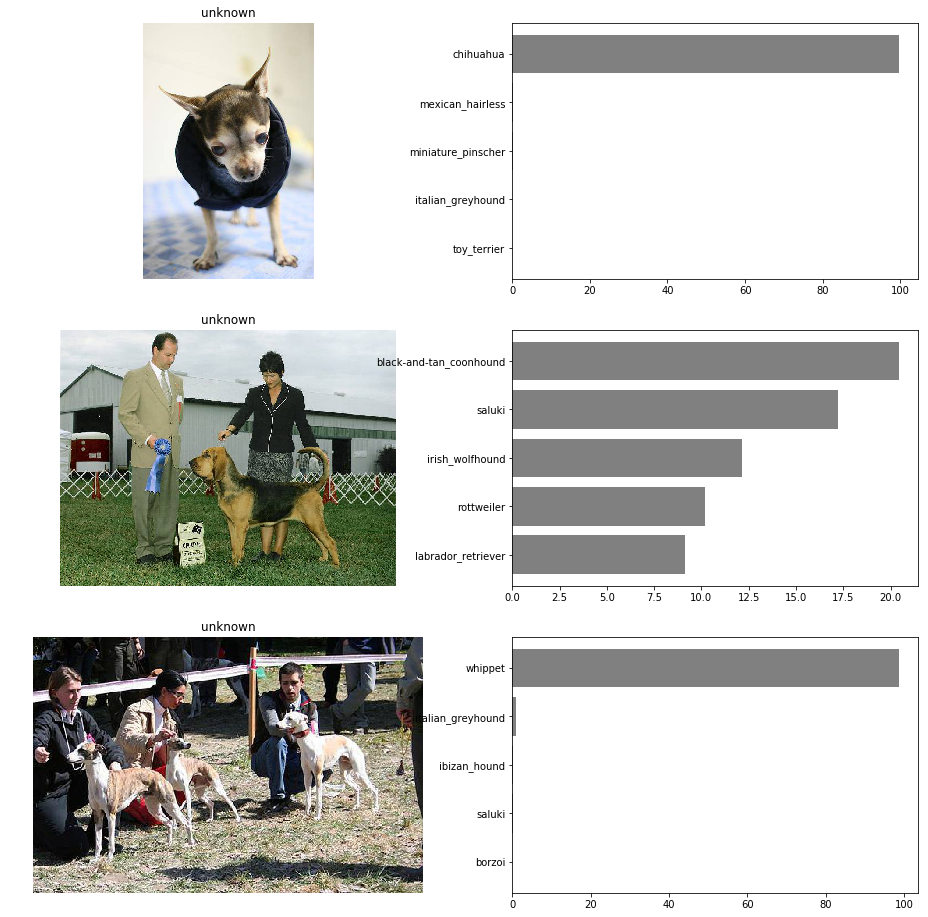

In [ ]:
# 8.38 Inception V3 특징 추출기-Sequential 모델의 test 데이터 분류 라벨 확인
import random
plt.figure(figsize=(16,16))
  
for c in range(3):
    image_path = random.choice(test_generator.filepaths)
    
    # 이미지 표시
    plt.subplot(3,2,c*2+1)
    plt.imshow(plt.imread(image_path))
    real_y = image_path.split('/')[3]
    plt.title(real_y)
    plt.axis('off')
    
    # 예측값 표시
    plt.subplot(3,2,c*2+2)
    img = cv2.imread(image_path)
    img = cv2.resize(img, dsize=(299, 299))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    # Inception V3를 이용한 특징 벡터 추출
    feature_vector = feature_model.predict(img)
    
    # Sequential 모델을 이용한 예측
    prediction = model.predict(feature_vector)[0]
    
    # 가장 높은 확률의 예측값 5개를 뽑음
    top_5_predict = prediction.argsort()[::-1][:5]
    labels = [unique_sorted_Y[index] for index in top_5_predict]
    color = ['gray'] * 5
    plt.barh(range(5), prediction[top_5_predict][::-1] * 100, color=color)
    plt.yticks(range(5), labels[::-1])

In [ ]:
# 8.39 submission 데이터프레임에 예측값 저장
for i in range(len(test_Y)):
    for j in range(len(test_Y[i])):
        breed_column = unique_sorted_Y[j]
        submission.loc[i, breed_column] = test_Y[i, j]

In [ ]:
# 8.40 submission 데이터 확인
print(submission.iloc[:5, :5])

                                 id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   3.981793e-06  4.035346e-07   
1  00102ee9d8eb90812350685311fe5890   1.418486e-07  1.048368e-07   
2  0012a730dfa437f5f3613fb75efcd4ce   1.033218e-06  3.167803e-03   
3  001510bc8570bbeee98c8d80c8a95ec1   3.167260e-06  6.154596e-08   
4  001a5f3114548acdefa3d4da05474c2e   2.117866e-02  2.365343e-05   

   african_hunting_dog      airedale  
0         3.242148e-09  7.689412e-07  
1         2.654105e-07  5.701812e-08  
2         4.798182e-06  1.757986e-06  
3         8.943101e-09  1.176513e-08  
4         3.404029e-07  8.784110e-07  


In [ ]:
# 8.41 submission 데이터프레임을 csv 파일로 저장
submission.to_csv('dogbreed_submission_inceptionV3_epoch10_299.csv', index=False)

#8.3 Neural Style Transfer

## 8.3.1 컨볼루션 신경망을 사용한 텍스쳐 합성

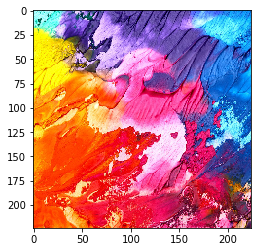

In [ ]:
# 8.42 원본 텍스쳐 이미지 불러오기
import matplotlib.pyplot as plt
import cv2

style_path = tf.keras.utils.get_file('style.jpg', 'http://bit.ly/2mGfZIq')

style_image = plt.imread(style_path)
style_image = cv2.resize(style_image, dsize=(224, 224))
style_image = style_image / 255.0
plt.imshow(style_image)

tf.Tensor([0.3679744  0.80404663 0.51379347], shape=(3,), dtype=float32)


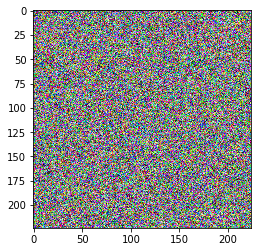

In [ ]:
# 8.43 타겟 텍스쳐 만들기
target_image = tf.random.uniform(style_image.shape)
print(target_image[0,0,:])
plt.imshow(target_image)

In [ ]:
# 8.44 VGG-19 네트워크 불러오기
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

vgg = VGG19(include_top=False, weights='imagenet')

for layer in vgg.layers:
    print(layer.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [ ]:
# 8.45 특징 추출 모델 만들기
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']

vgg.trainable = False
outputs = [vgg.get_layer(name).output for name in style_layers]
model = tf.keras.Model([vgg.input], outputs)

In [ ]:
# 8.46 Gram matrix 계산 함수 정의
def gram_matrix(input_tensor):
    channels = int(input_tensor.shape[-1])
    a = tf.reshape(input_tensor, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)

In [ ]:
# 8.47 원본 텍스쳐에서 gram matrix 계산
style_image = plt.imread(style_path)
style_image = cv2.resize(style_image, dsize=(224, 224))
style_image = style_image / 255.0

style_batch = style_image.astype('float32')
style_batch = tf.expand_dims(style_batch, axis=0)
style_output = model(preprocess_input(style_batch * 255.0))

(1, 224, 224, 64)


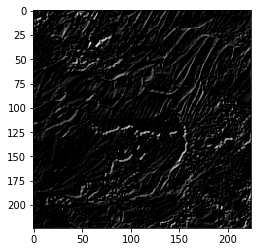

In [ ]:
# 8.48 원본 텍스쳐의 첫번째 특징 추출값 확인
print(style_output[0].shape)
plt.imshow(tf.squeeze(style_output[0][:,:,:,0], 0), cmap='gray')

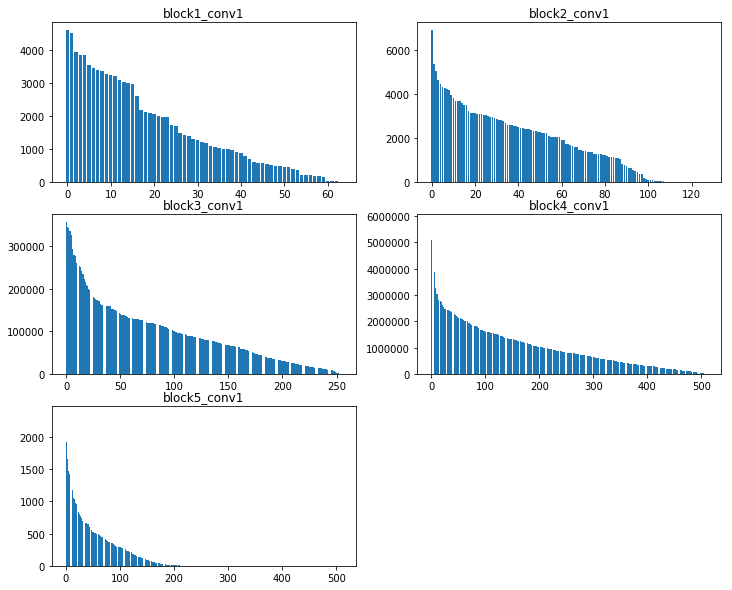

In [ ]:
# 8.49 원본 텍스쳐의 gram matrix 계산값 만들기, 분포 확인
style_outputs = [gram_matrix(out) for out in style_output]

plt.figure(figsize=(12,10))
for c in range(5):
    plt.subplot(3,2,c+1)
    array = sorted(style_outputs[c].numpy()[0].tolist())
    array = array[::-1]
    plt.bar(range(style_outputs[c].shape[0]), array)
    plt.title(style_layers[c])
plt.show()

In [ ]:
# 8.50 타겟 텍스쳐를 업데이트하기 위한 함수 정의
def get_outputs(image):
    image_batch = tf.expand_dims(image, axis=0)
    output = model(preprocess_input(image_batch * 255.0))
    outputs = [gram_matrix(out) for out in output]
    return outputs
  
def get_loss(outputs, style_outputs):
    return tf.reduce_sum([tf.reduce_mean((o-s)**2) for o,s in zip(outputs, style_outputs)])
  
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [ ]:
# 8.51 tf.function과 GradientTape을 이용한 이미지 업데이트 함수 정의
opt = tf.optimizers.Adam(learning_rate=0.2, beta_1=0.99, epsilon=1e-1)

@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = get_outputs(image)
        loss = get_loss(outputs, style_outputs)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

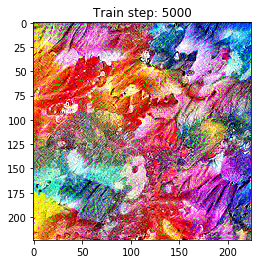

Total time: 301.4


In [ ]:
# 8.52 텍스쳐 합성 알고리즘 실행
import IPython.display as display
import time
import imageio

start = time.time()

image = tf.Variable(target_image)

epochs = 50
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
    if n % 5 == 0 or n == epochs - 1:
        imageio.imwrite('style_epoch_{0}.png'.format(n), image.read_value().numpy())
    display.clear_output(wait=True)
    plt.imshow(image.read_value())
    plt.title("Train step: {}".format(step))
    plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))

In [ ]:
# 8.53 varitation loss 함수 정의
def high_pass_x_y(image):
    x_var = image[:,1:,:] - image[:,:-1,:]
    y_var = image[1:,:,:] - image[:-1,:,:]
    return x_var, y_var

def total_variation_loss(image):
    x_deltas, y_deltas = high_pass_x_y(image)
    return tf.reduce_mean(x_deltas**2) + tf.reduce_mean(y_deltas**2)

In [ ]:
# 8.54 variation loss 비교
print('target   :', total_variation_loss(image.read_value()))
print('noise    :', total_variation_loss(tf.random.uniform(style_image.shape)))
print('original :', total_variation_loss(style_image))

target   : tf.Tensor(0.10429162, shape=(), dtype=float32)
noise    : tf.Tensor(0.33387828, shape=(), dtype=float32)
original : tf.Tensor(0.03641251305469578, shape=(), dtype=float64)


In [ ]:
# 8.55 variation loss를 loss 계산식에 추가, 각 loss의 가중치 추가
total_variation_weight = 1e9
style_weight = 1e-1

@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = get_outputs(image)
        loss = style_weight * get_loss(outputs, style_outputs)
        loss += total_variation_weight * total_variation_loss(image)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

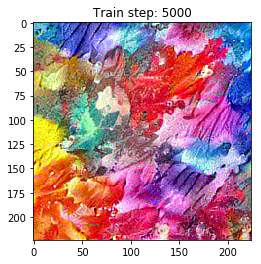

Total time: 302.5


In [ ]:
# 8.56 variation loss를 추가한 텍스쳐 합성 알고리즘 실행
start = time.time()

target_image = tf.random.uniform(style_image.shape)
image = tf.Variable(target_image)

epochs = 50
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
    if n % 5 == 0 or n == epochs - 1:
        imageio.imwrite('style_variation_epoch_{0}.png'.format(n), image.read_value().numpy())
    display.clear_output(wait=True)
    plt.imshow(image.read_value())
    plt.title("Train step: {}".format(step))
    plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))

In [ ]:
# 8.57 원본과 타겟의 variation loss 비교
print('target   :', total_variation_loss(image.read_value()))
print('original :', total_variation_loss(style_image))

target   : tf.Tensor(0.029161189, shape=(), dtype=float32)
original : tf.Tensor(0.03641251305469578, shape=(), dtype=float64)


## 8.3.2 컨볼루션 신경망을 사용한 Style Transfer (Neural Style Transfer)

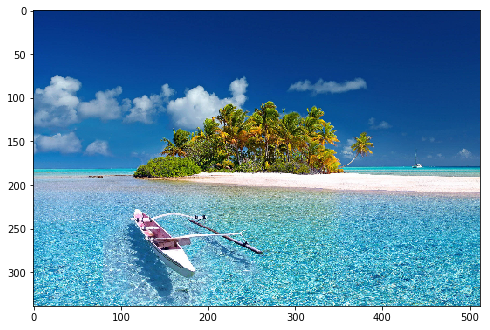

In [ ]:
# 8.58 content 텍스쳐 불러오기
import matplotlib.pyplot as plt
import cv2

content_path = tf.keras.utils.get_file('content.jpg', 'http://bit.ly/2mAfUX1')

content_image = plt.imread(content_path)
max_dim = 512
long_dim = max(content_image.shape[:-1])
scale = max_dim / long_dim
new_height = int(content_image.shape[0] * scale)
new_width = int(content_image.shape[1] * scale)

content_image = cv2.resize(content_image, dsize=(new_width, new_height))
content_image = content_image / 255.0
plt.figure(figsize=(8,8))
plt.imshow(content_image)

In [ ]:
# 8.59 content 특징 추출 모델 만들기
content_batch = content_image.astype('float32')
content_batch = tf.expand_dims(content_batch, axis=0)

content_layers = ['block5_conv2']

vgg.trainable = False
outputs = [vgg.get_layer(name).output for name in content_layers]
model_content = tf.keras.Model([vgg.input], outputs)
content_output = model_content(preprocess_input(content_batch * 255.0))

In [ ]:
# 8.60 content output, loss 함수 정의
def get_content_output(image):
    image_batch = tf.expand_dims(image, axis=0)
    output = model_content(preprocess_input(image_batch * 255.0))
    return output

def get_content_loss(image, content_output):
    return tf.reduce_sum(tf.reduce_mean(image-content_output)**2)

In [ ]:
# 8.61 content loss를 loss 계산식에 추가
opt = tf.optimizers.Adam(learning_rate=0.001, beta_1=0.99, epsilon=1e-1)

total_variation_weight = 1e9
style_weight = 1e-2
content_weight = 1e4

@tf.function()
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = get_outputs(image)
        output2 = get_content_output(image)
        loss = style_weight * get_loss(outputs, style_outputs)
        loss += content_weight * get_content_loss(output2, content_output)
        loss += total_variation_weight * total_variation_loss(image)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

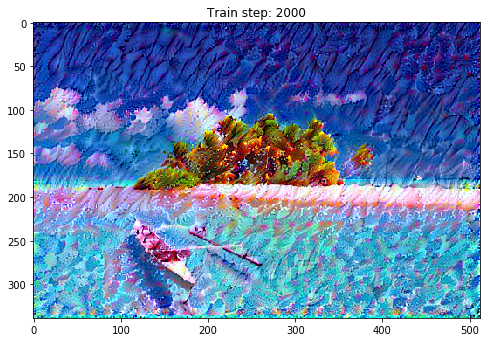

Total time: 660.8


In [ ]:
# 8.62 Neural Style Transfer 실행
start = time.time()

# target_image = tf.random.uniform(content_image.shape)
image = tf.Variable(content_image.astype('float32'))

epochs = 20
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(image)
        print(".", end='')
    if n % 5 == 0 or n == epochs - 1:
        imageio.imwrite('style_{0}_content_{1}_transfer_epoch_{2}.png'.format(style_weight, content_weight, n), image.read_value().numpy())
    display.clear_output(wait=True)
    plt.figure(figsize=(8,8))
    plt.imshow(image.read_value())
    plt.title("Train step: {}".format(step))
    plt.show()

end = time.time()
print("Total time: {:.1f}".format(end-start))

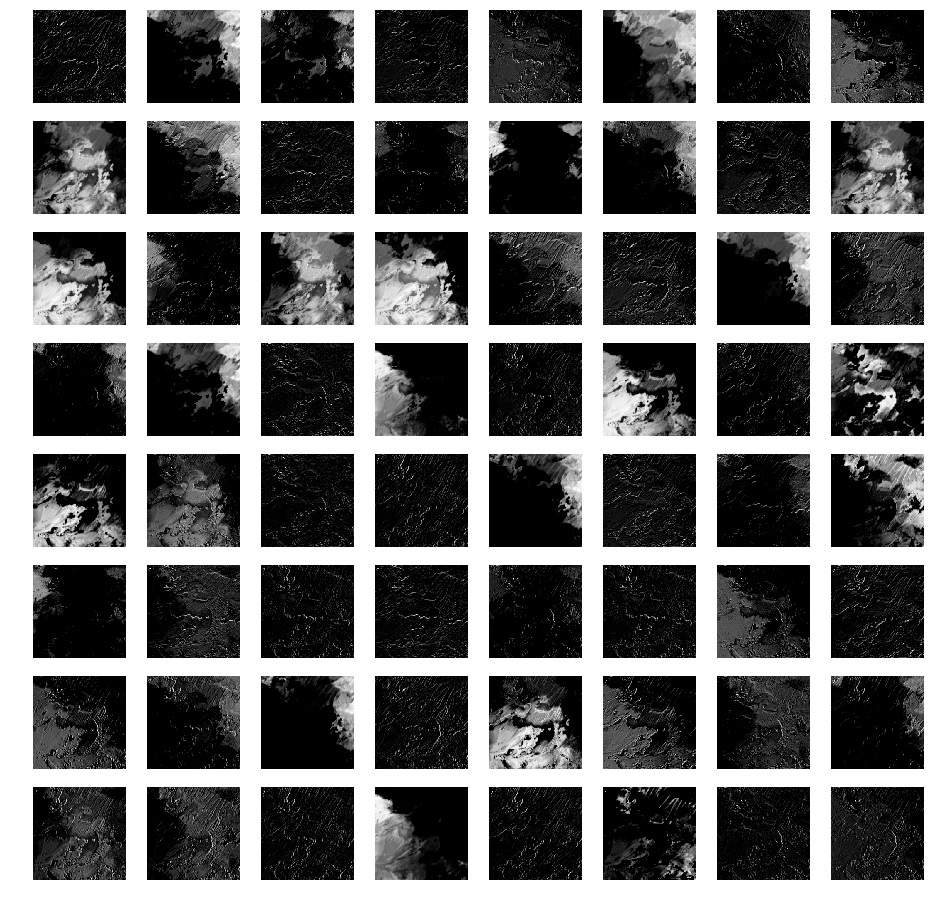

In [ ]:
# 그림 8.24 출력 코드
style_image = plt.imread(style_path)
style_image = cv2.resize(style_image, dsize=(224, 224))
style_image = style_image / 255.0

style_batch = style_image.astype('float32')
style_batch = tf.expand_dims(style_batch, axis=0)
style_output = model(preprocess_input(style_batch * 255.0))

plt.figure(figsize=(16,16))

for c in range(style_output[0].shape[-1]):
    plt.subplot(8,8,c+1)
    plt.axis('off')
    plt.imshow(tf.squeeze(style_output[0][:,:,:,c], 0), cmap='gray')